Analysing the sample datapoints given in txt file, it contains information about products purchased by customers. Each product has two features: price and quantity purchased. Your task is to cluster these products by applyinh k-means clustering algorithm based on these features to identify different product segments.  
You can take different k values and visualize the clusters.

Your result output should answer these three questions :


Analyzing the cluster centroids to understand the characteristics of each cluster.

Visualizing the clusters using a 2D scatter plot with different colors for each cluster.

Discuss the meaning of each cluster and how it might be used for product segmentation.

Data Shape: (20, 3)

First few rows of the data:
  ProductID  Price (in $)  QuantityPurchased
0         1            50                 10
1         2            60                  8
2         3            55                 12
3         4            80                  5
4         5            90                  3


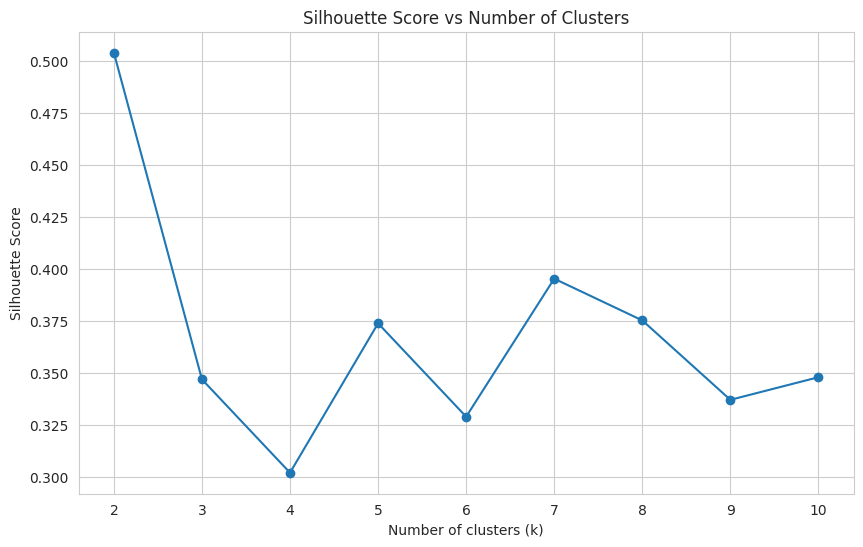


Optimal number of clusters based on silhouette score: 2


Analysis for k=2

Clustered Data Shape: (20, 4)

First few rows of the clustered data:
  ProductID  Price (in $)  QuantityPurchased  Cluster
0         1            50                 10        1
1         2            60                  8        1
2         3            55                 12        1
3         4            80                  5        0
4         5            90                  3        0


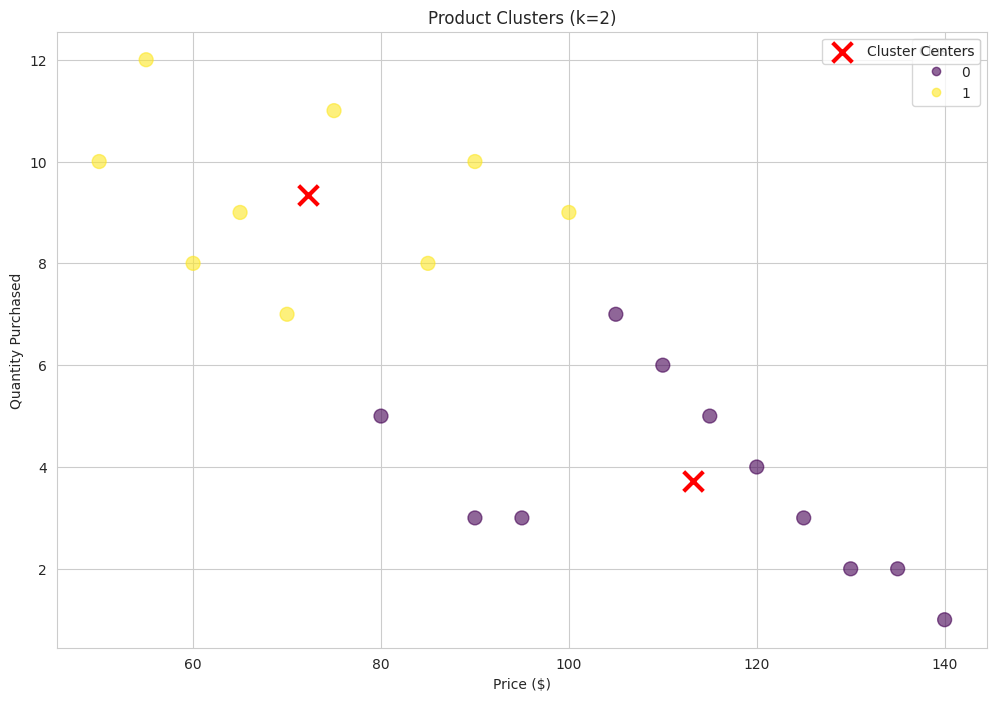


Cluster Analysis:
--------------------------------------------------

Cluster 1 Characteristics:
Number of products: 11
Average price: $113.18
Average quantity: 3.73
Price range: $80.00 - $140.00
Quantity range: 1 - 7

Product IDs in this cluster: 4, 5, 7, 8, 10, 12, 14, 15, 17, 18, 20

Cluster 2 Characteristics:
Number of products: 9
Average price: $72.22
Average quantity: 9.33
Price range: $50.00 - $100.00
Quantity range: 7 - 12

Product IDs in this cluster: 1, 2, 3, 6, 9, 11, 13, 16, 19


Analysis for k=3

Clustered Data Shape: (20, 4)

First few rows of the clustered data:
  ProductID  Price (in $)  QuantityPurchased  Cluster
0         1            50                 10        2
1         2            60                  8        2
2         3            55                 12        1
3         4            80                  5        2
4         5            90                  3        0


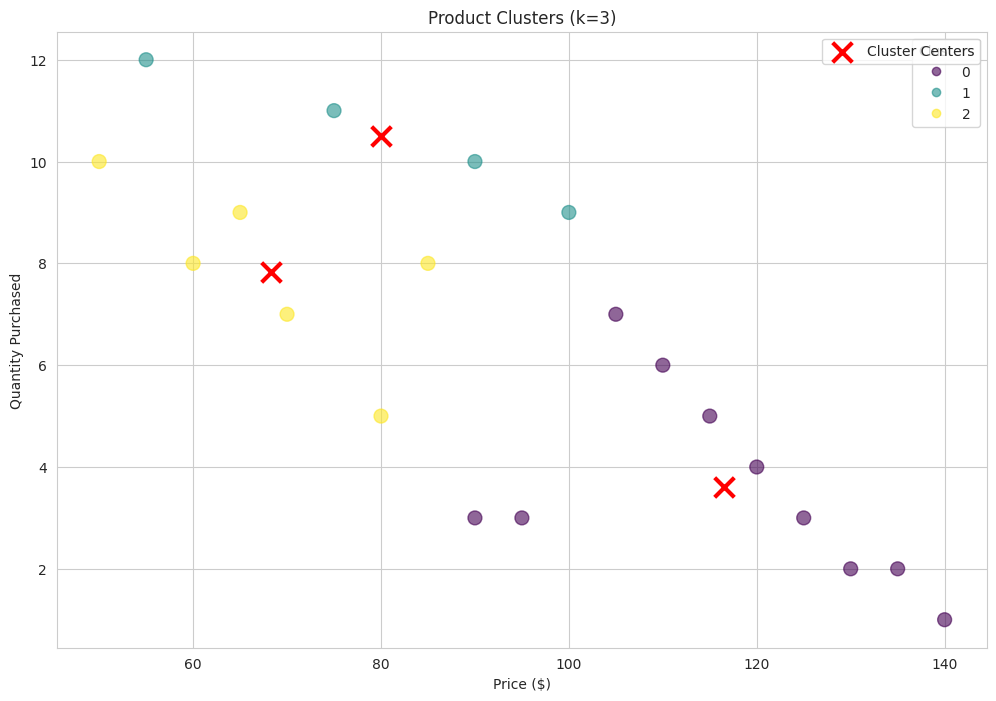


Cluster Analysis:
--------------------------------------------------

Cluster 1 Characteristics:
Number of products: 10
Average price: $116.50
Average quantity: 3.60
Price range: $90.00 - $140.00
Quantity range: 1 - 7

Product IDs in this cluster: 5, 7, 8, 10, 12, 14, 15, 17, 18, 20

Cluster 2 Characteristics:
Number of products: 4
Average price: $80.00
Average quantity: 10.50
Price range: $55.00 - $100.00
Quantity range: 9 - 12

Product IDs in this cluster: 3, 9, 13, 19

Cluster 3 Characteristics:
Number of products: 6
Average price: $68.33
Average quantity: 7.83
Price range: $50.00 - $85.00
Quantity range: 5 - 10

Product IDs in this cluster: 1, 2, 4, 6, 11, 16


Analysis for k=4

Clustered Data Shape: (20, 4)

First few rows of the clustered data:
  ProductID  Price (in $)  QuantityPurchased  Cluster
0         1            50                 10        2
1         2            60                  8        2
2         3            55                 12        1
3         4           

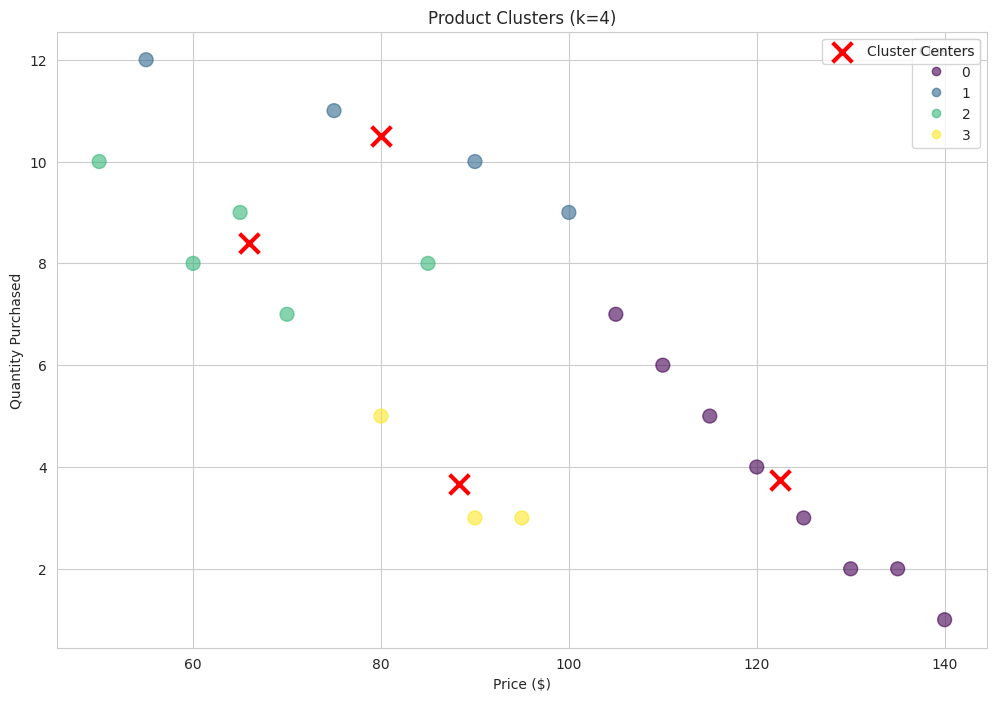


Cluster Analysis:
--------------------------------------------------

Cluster 1 Characteristics:
Number of products: 8
Average price: $122.50
Average quantity: 3.75
Price range: $105.00 - $140.00
Quantity range: 1 - 7

Product IDs in this cluster: 7, 8, 10, 14, 15, 17, 18, 20

Cluster 2 Characteristics:
Number of products: 4
Average price: $80.00
Average quantity: 10.50
Price range: $55.00 - $100.00
Quantity range: 9 - 12

Product IDs in this cluster: 3, 9, 13, 19

Cluster 3 Characteristics:
Number of products: 5
Average price: $66.00
Average quantity: 8.40
Price range: $50.00 - $85.00
Quantity range: 7 - 10

Product IDs in this cluster: 1, 2, 6, 11, 16

Cluster 4 Characteristics:
Number of products: 3
Average price: $88.33
Average quantity: 3.67
Price range: $80.00 - $95.00
Quantity range: 3 - 5

Product IDs in this cluster: 4, 5, 12


In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Read and prepare the data
def prepare_data(text_content):
    # Convert text content to DataFrame, handling extra spaces
    lines = text_content.strip().split('\n')
    data = []

    # Process each line
    for line in lines[1:]:  # Skip header
        # Split by multiple spaces or tabs and filter out empty strings
        values = [x.strip() for x in line.split('\t') if x.strip()]
        if len(values) == 3:  # Only take lines with 3 values
            data.append(values)

    # Create DataFrame with the processed data
    df = pd.DataFrame(data, columns=['ProductID', 'Price (in $)', 'QuantityPurchased'])

    # Convert columns to numeric
    df['Price (in $)'] = pd.to_numeric(df['Price (in $)'])
    df['QuantityPurchased'] = pd.to_numeric(df['QuantityPurchased'])

    return df

def find_optimal_k(X, max_k=10):
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)

    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k+1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.grid(True)
    plt.show()

    # Return optimal k
    return np.argmax(silhouette_scores) + 2

def perform_clustering(df, k):
    # Extract features for clustering
    X = df[['Price (in $)', 'QuantityPurchased']]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)

    # Get cluster centers in original scale
    centers_scaled = kmeans.cluster_centers_
    centers = scaler.inverse_transform(centers_scaled)

    return df, centers

def visualize_clusters(df, centers, k):
    # Set up the plot style
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    # Create scatter plot
    scatter = plt.scatter(df['Price (in $)'], df['QuantityPurchased'],
                         c=df['Cluster'], cmap='viridis',
                         s=100, alpha=0.6)

    # Plot cluster centers
    plt.scatter(centers[:, 0], centers[:, 1],
               c='red', marker='x', s=200, linewidths=3,
               label='Cluster Centers')

    # Add labels and title
    plt.xlabel('Price ($)')
    plt.ylabel('Quantity Purchased')
    plt.title(f'Product Clusters (k={k})')

    # Add legend
    legend1 = plt.legend(*scatter.legend_elements(),
                        title="Clusters")
    plt.legend([plt.scatter([], [], c='red', marker='x', s=200, linewidths=3)],
              ['Cluster Centers'], loc='upper right')
    plt.gca().add_artist(legend1)

    plt.show()

def analyze_clusters(df, centers, k):
    print("\nCluster Analysis:")
    print("-" * 50)

    for i in range(k):
        cluster_data = df[df['Cluster'] == i]
        print(f"\nCluster {i+1} Characteristics:")
        print(f"Number of products: {len(cluster_data)}")
        print(f"Average price: ${cluster_data['Price (in $)'].mean():.2f}")
        print(f"Average quantity: {cluster_data['QuantityPurchased'].mean():.2f}")
        print(f"Price range: ${cluster_data['Price (in $)'].min():.2f} - ${cluster_data['Price (in $)'].max():.2f}")
        print(f"Quantity range: {cluster_data['QuantityPurchased'].min():.0f} - {cluster_data['QuantityPurchased'].max():.0f}")
        print("\nProduct IDs in this cluster:", ', '.join(cluster_data['ProductID'].tolist()))

def main():
    # Sample data
    text_content = """ProductID	Price (in $)	QuantityPurchased
1		50		10
2		60		8
3		55		12
4		80		5
5		90		3
6		70		7
7		110		6
8		120		4
9		100		9
10		130		2
11		85		8
12		95		3
13		75		11
14		115		5
15		140		1
16		65		9
17		105		7
18		125		3
19		90		10
20		135		2"""

    # Prepare data
    df = prepare_data(text_content)
    print("Data Shape:", df.shape)
    print("\nFirst few rows of the data:")
    print(df.head())

    # Find optimal k using silhouette score
    X = StandardScaler().fit_transform(df[['Price (in $)', 'QuantityPurchased']])
    optimal_k = find_optimal_k(X)
    print(f"\nOptimal number of clusters based on silhouette score: {optimal_k}")

    # Try different k values
    k_values = [2, 3, optimal_k] if optimal_k not in [2, 3] else [2, 3, 4]

    for k in k_values:
        print(f"\n\nAnalysis for k={k}")
        print("=" * 50)

        # Perform clustering
        clustered_df, centers = perform_clustering(df, k)
        print("\nClustered Data Shape:", clustered_df.shape)
        print("\nFirst few rows of the clustered data:")
        print(clustered_df.head())
        # Visualize clusters
        visualize_clusters(clustered_df, centers, k)

        # Analyze clusters
        analyze_clusters(clustered_df, centers, k)

if __name__ == "__main__":
    main()